# matplotalt Examples

In these examples, we use matplotalt's ``show_with_alt``, ``generate_alt_text``, and ``add_alt_text`` to programatically generate and display image descriptions for several figure types.

To export this notebook as HTML uncomment and run the cell below:

In [1]:
#import os
#os.system('jupyter nbconvert --to html ./examples.ipynb')

In [ ]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotalt import show_with_alt, generate_alt_text, add_alt_text

## Sunshine and Bikes in Seattle (Bar, Line, Pie and Radial charts)

In this section, we introduce how to use matplotalt functions with examples on four chart types. We use monthly average sunshine hours in seattle and bike count from the [Fremont Bridge Bicycle Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k) as data. The goal of the following visualizations is to show that both datasets are correlated and have seasonal patterns.

In [ ]:
# Data
bikes_over_fremont_bridge = np.array([112252.8, 103497.2, 136189.2, 165020.4, 231792, 221274.8,
                                      234421.6, 224087.2, 190238, 166078, 121548, 89695.6])
sunshine_hours = np.array([69, 108, 178, 207, 253, 268, 312, 281, 221, 142, 72, 52])
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

### Bar chart

After creating a plot with matplotlib, we can automatically generate and surface alt text with matplotalt's ``show_with_alt`` method. ``show_with_alt`` should replace calls to ``matplotlib.pyplot.show``, and will not work if ``plt.show`` is called first.

By default, ``show_with_alt`` displays the matplotlib figure in html with its generated alt text in the alt property. To make the alt text visible to non-screenreader users in this example, we pass the "markdown" flag to ``show_with_alt``'s methods parameter. Currently supported display methods include:

- "html": Display image in html with generated alt attribute
- "markdown": Display alt text in markdown as cell output
- "new_cell": Write alt text to a new code cell with the %%markdown magic on the first line
- "img_file": Save figure with alt text to a jpg at the output_file param
- "text_file": Save the alt text to a text file at the output_file param

Note that multiple methods can be passed as a list. A data table is also created from the chart data and displayed in the markdown output if possible.

A bar chart titled 'average number of bikes crossing fremont bridge each month from 2014-2018'. Avg. # bikes crossing fremont bridge is plotted on the x-axis from 0 to 250000 using a linear scale and month is plotted on the y-axis from jan to dec using a datetime scale. The data has 12 points, a minimum value of x=89700 at y=dec, a maximum value of x=234400 at y=july, and an average of x=166300.
data table:

| avg. # bikes crossing fremont bridge | month | month ticklabels |
| ------------------------------------ | ----- | ---------------- |
| 112300                               | 0     | jan              |
| 103500                               | 1     | feb              |
| 136200                               | 2     | mar              |
| 165000                               | 3     | apr              |
| 231800                               | 4     | may              |
| 221300                               | 5     | june             |
| 234400                               | 6     | july             |
| 224100                               | 7     | aug              |
| 190200                               | 8     | sep              |
| 166100                               | 9     | oct              |
| 121500                               | 10    | nov              |
| 89700                                | 11    | dec              |


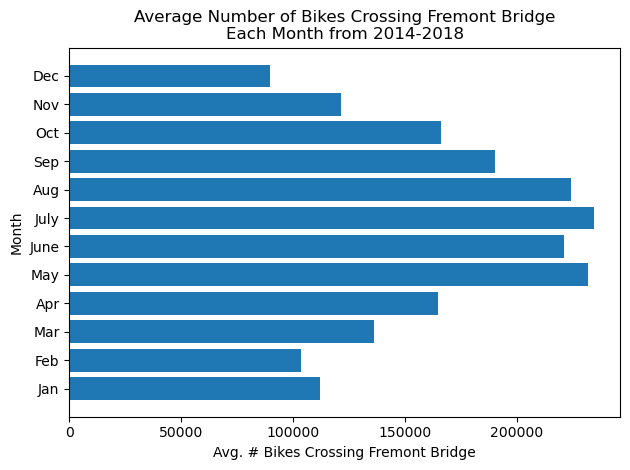

<Figure size 640x480 with 0 Axes>

In [ ]:
# (2) Bar chart
# Bike count averaged over 2014-2018 from the Freemont Bridge Bicycle Counter (https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
fig, ax = plt.subplots()
ax.set_title("Average Number of Bikes Crossing Fremont Bridge\nEach Month from 2014-2018")
ax.barh(list(range(12)), bikes_over_fremont_bridge)
ax.set_xlabel("Avg. # Bikes Crossing Fremont Bridge")
ax.set_ylabel("Month")
ax.set_yticks(ticks=list(range(0, 12)), labels=months)
plt.tight_layout()

show_with_alt(methods="markdown")

### Line chart

We can choose how descriptive the alt text should be with the ``desc_level`` parameter. These levels are based on [Lundgard and Satyanarayan 2021](https://ieeexplore.ieee.org/abstract/document/9555469). Currently supported desc_levels are:

- 1: Only axes and color descriptions
- 2: level 1 + Statistics about the data
- 3: level 2 + Data trends and correlation between variables

By default, the ``desc_level`` is set to 2.

We can also pass "table" as a method or set include_table=True to generate a markdown table with the chart's data. The table will not be included in non-markdown display methods.

A line plot titled 'average monthly hours of sunshine in seattle vs. Number of bikes that cross fremont bridge'. Month is plotted on the x-axis from jan to nov using a datetime scale and change from yearly average (%) is plotted on the y-axis from -80 to 100 using a linear scale. # bikes crossing fremont bridge is plotted in dark blue and hours of sunshine is plotted in orange. There is a horizontal line at y=0.0. An annotation reads '234421 bikes in july'. # bikes crossing fremont bridge has a minimum value of y=-46.08 at x=12, a maximum value of y=40.93 at x=7, and an average of y=0. Hours of sunshine has a minimum value of y=-71.15 at x=12, a maximum value of y=73.09 at x=7, and an average of y=0.
data table:

| month | # bikes crossing fremont bridge (change from yearly average (%)) | hours of sunshine (change from yearly average (%)) |
| ----- | ---------------------------------------------------------------- | -------------------------------------------------- |
| 0     | -32.52                                                           | -61.72                                             |
| 1     | -37.78                                                           | -40.08                                             |
| 2     | -18.13                                                           | -1.248                                             |
| 3     | -0.7941                                                          | 14.84                                              |
| 4     | 39.35                                                            | 40.36                                              |
| 5     | 33.02                                                            | 48.68                                              |
| 6     | 40.93                                                            | 73.09                                              |
| 7     | 34.72                                                            | 55.89                                              |
| 8     | 14.37                                                            | 22.61                                              |
| 9     | -0.1582                                                          | -21.22                                             |
| 10    | -26.93                                                           | -60.06                                             |
| 11    | -46.08                                                           | -71.15                                             |


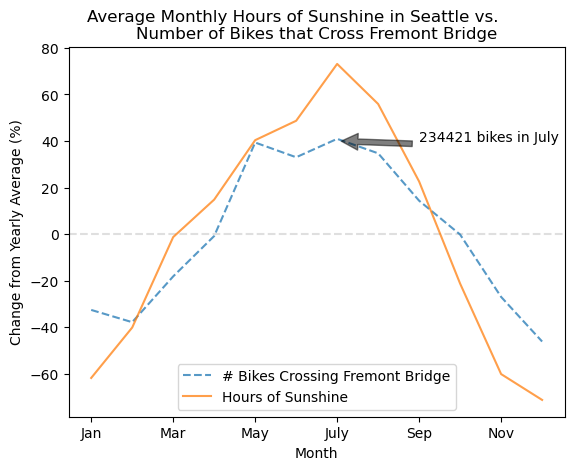

<Figure size 640x480 with 0 Axes>

In [ ]:
# (1) Line Chart
avg_bikes = np.mean(bikes_over_fremont_bridge)
avg_hours = np.mean(sunshine_hours)
normalized_bikes = 100 * (bikes_over_fremont_bridge - avg_bikes) / avg_bikes
normalized_sunshine = 100 * (sunshine_hours - avg_hours) / avg_hours

plt.title("Average Monthly Hours of Sunshine in Seattle vs. \
        \nNumber of Bikes that Cross Fremont Bridge")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.25)
plt.plot(normalized_bikes, ls="--", label="# Bikes Crossing Fremont Bridge", alpha=0.75)
plt.plot(normalized_sunshine, label="Hours of Sunshine", alpha=0.75)
plt.xticks(ticks=list(range(0, 11, 2)), labels=months[::2])
plt.xlabel("Month")
plt.ylabel("Change from Yearly Average (%)")
plt.annotate('234421 bikes in July', xy=(6, 40), xytext=(8, 40), arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))
plt.legend()

starter_alt = generate_alt_text()

show_with_alt(methods=["markdown"])

### Pie chart

If using a desc_level >= 2, we can manually specifiy which statistics to calculate from the chart's data using the stats parameter.

A pie chart titled 'percentage of annual sunshine'. There are 12 slices: jan (3.19%), feb (4.993%), mar (8.229%), apr (9.57%), may (11.7%), june (12.39%), july (14.42%), aug (12.99%), sep (10.22%), oct (6.565%), nov (3.329%), and dec (2.404%). The data has a standard deviation of x=4.006, an average of x=8.333, a maximum value of x=14.42, and a minimum value of x=2.404. The data strictly increase up to their max at x=14.42, then strictly decrease.

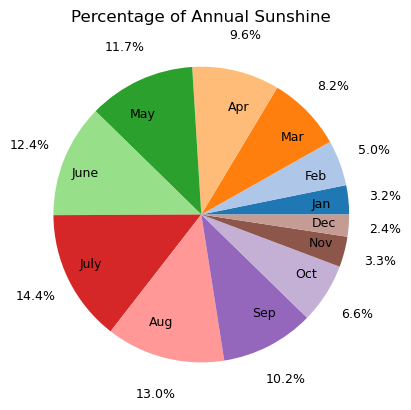

<Figure size 640x480 with 0 Axes>

In [ ]:
# (3) Pie chart
cmap = plt.cm.tab20
colors = cmap(list(range(12)))
plt.pie(sunshine_hours, labels=months, autopct='%1.1f%%', pctdistance=1.25,
                        labeldistance=0.75, colors=colors, textprops={'fontsize': 9})
plt.title("Percentage of Annual Sunshine")

show_with_alt(desc_level=3, methods=["markdown"], stats=["std", "mean", "max", "min"])

### Radial line chart

We can also seperately generate and surface the alt text with the ``generate_alt_text`` and ``add_alt_text`` methods. We can also disable the inclusion of markdown tables by setting the ``include_table`` parameter to ``"never"``.

A radial line plot titled 'avg. Monthly hours of sunshine in seattle'. The x-axis ranges from jan to dec using a datetime scale and the y-axis ranges from 0 to 312 using a linear scale. Avg. Hours of sunshine is plotted in orange. Avg. Hours of sunshine has a minimum value of y=52 at x=dec, a maximum value of y=312 at x=july, and an average of y=180.2.


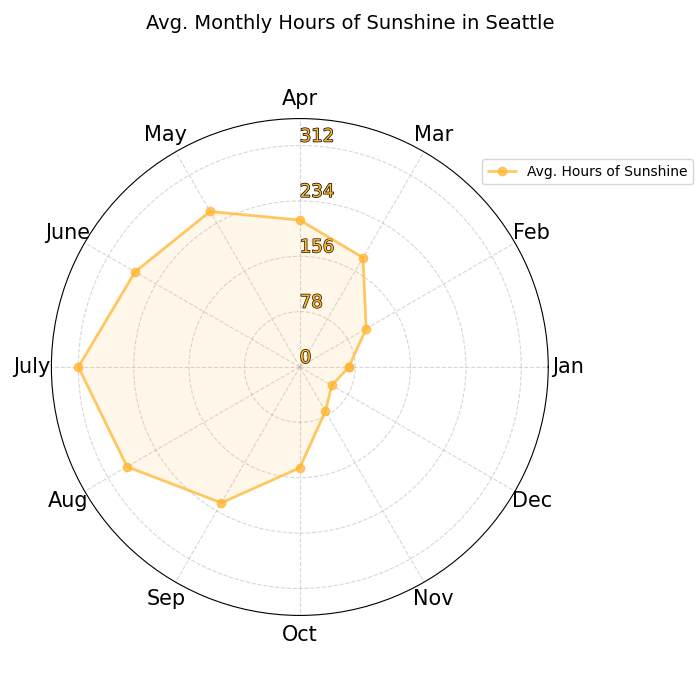

In [ ]:
# (4) Radial line chart
from matplotlib import patheffects
from scipy.interpolate import pchip

SUN_COLOR = "#FFB631"

# Convert bike and sunshine stats into radial coordinates
monthnums = np.array(list(range(12)))
r = sunshine_hours
theta = (monthnums * np.pi) / 6
interp = pchip(theta, r)
tt = np.linspace(0, 2 * np.pi, 360)
r = list(sunshine_hours) + [sunshine_hours[0]]
theta = list(theta) + [theta[0]]
interptt = list(interp(tt)) + [interp(tt)[0]]
tt = list(tt) + [tt[0]]

# Start building matplotlib figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.suptitle("Avg. Monthly Hours of Sunshine in Seattle", fontsize=14)
ax.set_rticks(np.linspace(0, np.amax(r), 5))  # Reduce the number of radial ticks
bike_labels = (np.linspace(0, np.amax(bikes_over_fremont_bridge), 5).astype(int) // 1000).astype(str)
bike_labels = [l + "K" for l in bike_labels]
bike_labels[0] = "0"
ax.set_rlabel_position(ax.get_rlabel_position())
ax.set_rlabel_position(90)
ax.tick_params(labelsize=13)
# Add outside month labels
ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))
ax.set_xticklabels(months, fontsize=15)
# Add dashed grid lines
ax.grid(True, alpha=0.5, linestyle="dashed")
ax.set_axisbelow(True)
plt.setp(ax.get_yticklabels(), color=SUN_COLOR)
ax.set_ylim([0, 350])

# Plot the radial lines and fills
ax.plot(theta, r, linewidth=2, color=SUN_COLOR, label='Avg. Hours of Sunshine',
        solid_capstyle='round', zorder=100, marker="o", alpha=0.75)
ax.fill_between(theta, r, facecolor=SUN_COLOR, alpha=0.1, zorder=99)
ax.legend(loc="lower left", bbox_to_anchor=(.5 + np.cos(np.pi / 4)/2, .5 + np.sin(np.pi / 4)/2))

# Add outlines for the tick labels to increase contrast
for tick in (ax.get_yticklabels()):
  tick.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
# Make sure ticks are drawn on top of lines and fills
ax.tick_params(zorder=200)
plt.gcf().set_size_inches(7, 7)
plt.tight_layout()

starter_alt = generate_alt_text(include_table="never")
add_alt_text(starter_alt, methods=["markdown", "img_file", "html"])

## 2d Gaussian example (scatter, strip, contour plots, and heatmaps)

In this section we cover four more chart types with a larger dataset of points from 2d gaussian distributions

In [ ]:
# Data
blue_random_gaussian_2d = np.random.multivariate_normal([1, 2], [[4, -2], [-2, 3]], size=350)
orange_random_gaussian_2d = np.random.multivariate_normal([-4, 3], [[3, -1], [-1, 3]], size=250)

### Scatter plot

A scatter plot titled 'points from 2d gaussian distributions'. Random gaussian x is plotted on the x-axis from -12.5 to 10 and random gaussian y is plotted on the y-axis from -4 to 10, both using linear scales. The blue dots is plotted in dark blue and the orange dots is plotted in orange. The blue dots has 350 points, an average of x=0.9934, an average of y=2.071, a linear fit of y=-0.4376x+2.506, and 6 outliers. The orange dots has 250 points, an average of x=-4.321, an average of y=3.32, a linear fit of y=-0.2089x+2.417, and 7 outliers.


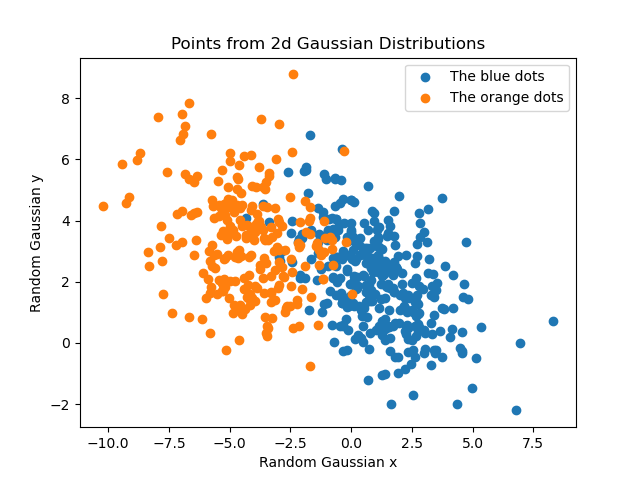

<Figure size 640x480 with 0 Axes>

In [ ]:
# (5) Scatterplot
plt.scatter(blue_random_gaussian_2d[:, 0], blue_random_gaussian_2d[:, 1], label="The blue dots")
plt.scatter(orange_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 1], label="The orange dots")
plt.title("Points from 2d Gaussian Distributions")
plt.xlabel("Random Gaussian x")
plt.ylabel("Random Gaussian y")
plt.legend()

# img_file will write to a file based on the chart's title if no output_file is given
show_with_alt(methods=["html", "markdown", "img_file"])

### Strip plot

Since strip plots are a subset of scatterplots, we manually pass chart_type="strip" as one of the parameters

A strip plot. Random gaussian x is plotted on the x-axis from -12.5 to 10 using a linear scale and the y-axis ranges from the blue dots to the orange dots using a categorical scale. Strip 1 has 350 points, a median of x=0.945, and 5 outliers. Strip 2 has 250 points, a median of x=-4.31, and 6 outliers.


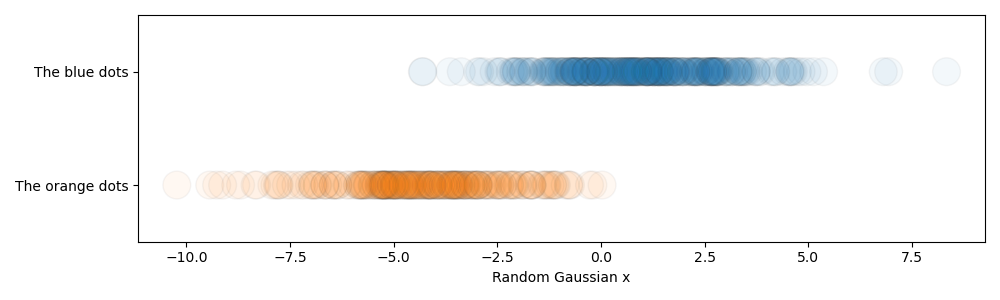

<Figure size 640x480 with 0 Axes>

In [ ]:
# (6) Strip plot
sns.stripplot([blue_random_gaussian_2d[:, 0], orange_random_gaussian_2d[:, 0]],
              jitter=False, size=20, linewidth=1, alpha=0.05, orient="h")
plt.gcf().set_size_inches(10, 3)
plt.xlabel("Random Gaussian x")
plt.yticks(ticks=[0, 1], labels=["The blue dots", "The orange dots"])
plt.tight_layout()

show_with_alt(chart_type="strip", desc_level=3, methods=["html", "markdown"])

### Heatmap

A 7x6 heatmap titled 'number of points from combined gaussians'. The x-axis ranges from -8 to 6, the y-axis ranges from -4 to 8, and number of gaussian points is plotted on the z-axis from 0 to 71, all using linear scales. The data has a minimum value of z=0 at (-8, -4), a maximum value of z=71 at (0, -4), and an average of z=14.


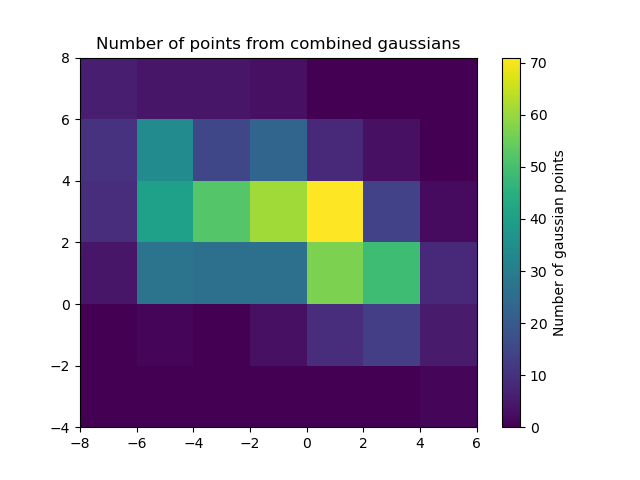

<Figure size 640x480 with 0 Axes>

In [ ]:
# (7) Heatmap
combined_points = np.concatenate((blue_random_gaussian_2d, orange_random_gaussian_2d))
plt.hist2d(combined_points[:, 0], combined_points[:, 1], bins=(range(-8, 8, 2), range(-4, 10, 2)))
plt.title('Number of points from combined gaussians')
plt.colorbar(label="Number of gaussian points")
show_with_alt(chart_type="heatmap", methods=["html", "markdown"])

### Contour plot

A contour plot titled 'number of points from combined gaussians'. The x-axis ranges from -12 to 8 and the y-axis ranges from -4 to 8, both using linear scales. 10 contour lines are plotted with values 0, 0, 0, 8, 16, 24, 32, 40, 40, and 48. The max contour is centered around (-4.008, 3.827).


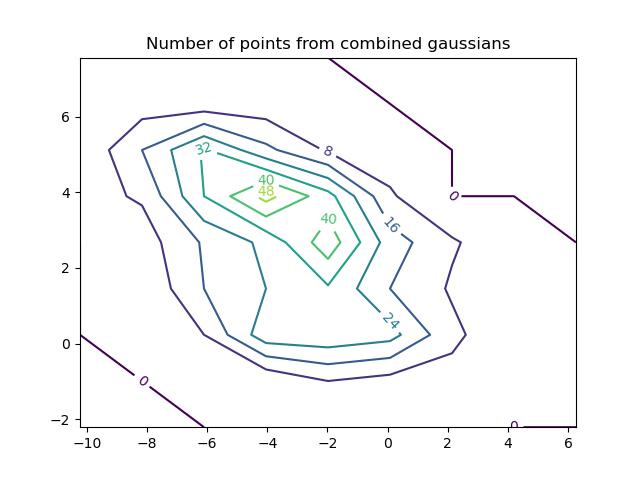

<Figure size 640x480 with 0 Axes>

In [ ]:
# (8) Contour plot
hist_bins, xbins, ybins = np.histogram2d(combined_points[:, 0], combined_points[:, 1], bins=9)
X, Y = np.meshgrid(xbins[:-1], ybins[:-1])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, hist_bins)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Number of points from combined gaussians')

show_with_alt(chart_type="contour", methods=["html", "markdown"])

## Anscombe's quartet (multiple Subplots, boxplot)

``generate_alt_text`` can also handle figures with multiple subplots. In that case, it outputs the suptitle and then paragraphs containing the alt text for each subplot seperated by newlines.

In this example we have four line subplots displaying Anscombe's Quartet. Each line plot has the same mean, standard deviation, and line of fit, but very different shapes. The second subplot, for example, looks similar to a parabola while the fourth has all its points at the same x position with a single outlier.

x and y coordinates for each of the lines are in the table below:

| x1, x2, x3 | y1    | y2   | y3    | x4 | y4    |
|------|-------|------|-------|----|-------|
| 10   | 8.04  | 9.14 | 7.46  | 8  | 6.58  |
| 8    | 6.95  | 8.14 | 6.77  | 8  | 5.76  |
| 13   | 7.58  | 8.74 | 12.74 | 8  | 7.71  |
| 9    | 8.81  | 8.77 | 7.11  | 8  | 8.84  |
| 11   | 8.33  | 9.26 | 7.81  | 8  | 8.47  |
| 14   | 9.96  | 8.10 | 8.84  | 8  | 7.04  |
| 6    | 7.24  | 6.13 | 6.08  | 8  | 5.25  |
| 4    | 4.26  | 3.10 | 5.39  | 8  | 5.56  |
| 12   | 10.84 | 9.13 | 8.15  | 8  | 7.91  |
| 7    | 4.82  | 7.26 | 6.42  | 8  | 6.89  |
| 5    | 5.68  | 4.74 | 5.73  | 19 | 12.50 |


### Multiple subplots

A figure with 4 subplots titled 'Anscombe's Quartet'.

 Subplot 1: A line plot. The x-axis ranges from 2.5 to 15 and the y-axis ranges from 2 to 12, both using linear scales. The data are plotted in dark blue. The data has a linear fit of y=0.5001x+3, an average of y=7.501, and a standard deviation of y=1.937. The data generally increase up to their max at x=12.

 Subplot 2: A line plot. The x-axis ranges from 2.5 to 15 and the y-axis ranges from 2 to 10, both using linear scales. The data are plotted in dark blue. The data has a linear fit of y=0.5x+3.001, an average of y=7.501, and a standard deviation of y=1.937. The data strictly increase up to their max at x=11, then strictly decrease.

 Subplot 3: A line plot. The x-axis ranges from 2.5 to 15 and the y-axis ranges from 4 to 14, both using linear scales. The data are plotted in dark blue. The data has a linear fit of y=0.4997x+3.002, an average of y=7.5, and a standard deviation of y=1.936. The data strictly increase up to their max at x=13, then strictly decrease.

 Subplot 4: A line plot. The x-axis ranges from 5 to 20 and the y-axis ranges from 4 to 14, both using linear scales. The data are plotted in dark blue. The data has a linear fit of y=0.4999x+3.002, an average of y=7.501, and a standard deviation of y=1.936.


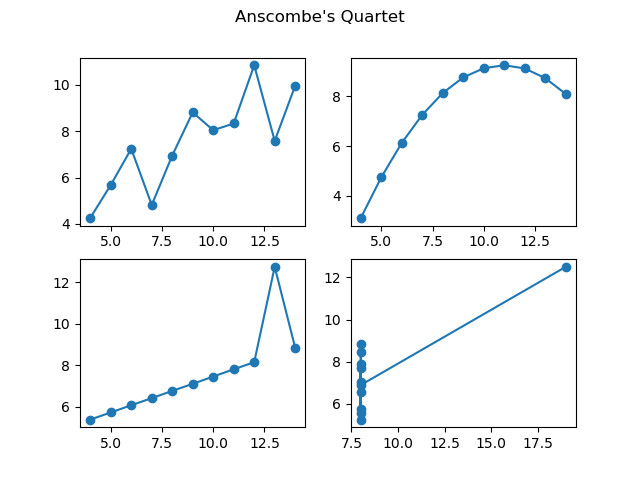

<Figure size 640x480 with 0 Axes>

In [ ]:
# (9) Multiple Subplots
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 7.91, 6.89, 12.50])
x_order = np.argsort(x)

fig, axs = plt.subplots(2, 2)
fig.suptitle("Anscombe's Quartet")
axs[0][0].plot(x[x_order], y1[x_order], "-o")
axs[0][1].plot(x[x_order], y2[x_order], "-o")
axs[1][0].plot(x[x_order], y3[x_order], "-o")
axs[1][1].plot(x4, y4, "-o")

show_with_alt(desc_level=3, methods=["html", "markdown", "img_file"], stats=["linearfit", "mean", "std"], include_table="never")

### Box plot


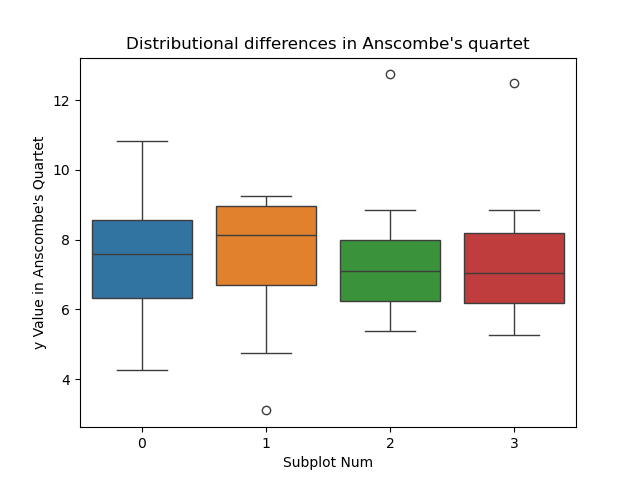

<Figure size 640x480 with 0 Axes>

In [ ]:
# (10) Boxplot
bp = sns.boxplot([y1, y2, y3, y4])
plt.ylabel("y Value in Anscombe's Quartet")
plt.xlabel("Subplot Num")
plt.title("Distributional differences in Anscombe's quartet")

show_with_alt(methods=["html"])

### Fractal image

c:\Users\Kai\anaconda3\envs\main\lib\site-packages\numpy\core\function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
c:\Users\Kai\anaconda3\envs\main\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\Kai\anaconda3\envs\main\lib\site-packages\numpy\core\function_base.py:298: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
c:\Users\Kai\anaconda3\envs\main\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


A 50x50 image titled 'z^3 + 0.66 iterations before reaching a threshold of 2'. The x-axis ranges from -0.5 to 49.5 using a numerical scale, the y-axis ranges from -0.5 to 49.5 using a linear scale, and iterations is plotted on the z-axis from 0 to 17 using a linear scale. The data has a minimum value of z=0 at (0, 0), a maximum value of z=17 at (38, 12), and an average of z=2.511.

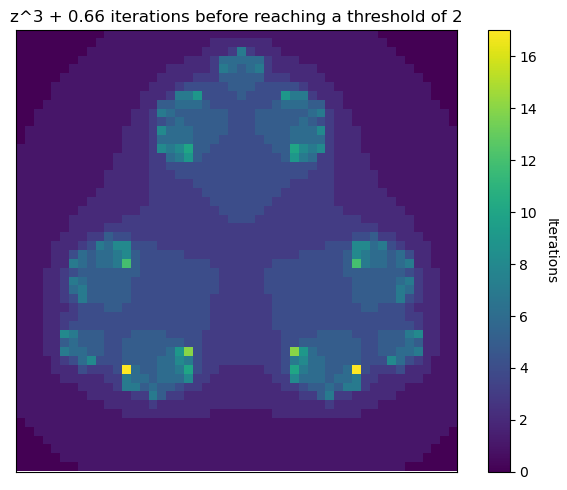

<Figure size 640x480 with 0 Axes>

In [ ]:
def render_fractal(width, height, thresh, max_iter, c, fractal_func, zoom_w=1.0, zoom_h=1.0, x=0.0, y=0.0):
  cur_iter = 0
  thresh_sq = thresh**2
  pixels = np.zeros(width * height)
  zxs = x + (2.0 * np.arange(width) / width - 1.0) * 2.0 / zoom_w
  zys = y + (2.0 * np.arange(height) / height - 1.0) * 2.0 / zoom_h
  zxs = np.tile(zxs, height)
  zys = np.repeat(zys, width)
  z = zxs + zys * 1j

  update_idxs = np.arange(width * height)

  while len(update_idxs) > 0 and cur_iter < max_iter:
    z[update_idxs] = fractal_func(z[update_idxs])
    z[update_idxs] += c
    converged_idxs = np.where(np.absolute(z[update_idxs]) > thresh_sq)[0]
    pixels[update_idxs[converged_idxs]] = cur_iter
    update_idxs = np.delete(update_idxs, converged_idxs)
    cur_iter += 1

  pixels[update_idxs] = max_iter
  return np.reshape(pixels, (width, height), order="F")


def tri_julia(z):
  return np.power(z, 3)


pixels = render_fractal(50, 50, thresh=2, max_iter=100, c=0.66, fractal_func=tri_julia, zoom_h=1.5, zoom_w=1.5)
plt.xticks([])
plt.yticks([])
plt.imshow(pixels)
cbar = plt.colorbar()
cbar.set_label('Iterations', rotation=270, labelpad=15)
plt.tight_layout()
plt.title("z^3 + 0.66 iterations before reaching a threshold of 2")

show_with_alt(methods="markdown")